# Quantum Systems

- Solve the time-independent Schrodinger equation (TISE)
\begin{equation*}
-\frac{\hbar^2}{2m} \frac{d^2 \phi(x)}{dx^2} + V(x) \phi(x) = E \phi(x)
\end{equation*}
by considering bound-state solutions.
- Acceptable solutions exist only if the eigenvalues are
  quantized, i.e., restricted to a discrete set of energies.
- To be acceptable, $\phi_n(x)$ must be finite for all $x$ and
  bounded for large $|x|$ so the $\phi_n(x)$ can be normalized.
- For finite $V(x)$, $\phi_n(x)$ and $d \phi_n(x)/dx$ must be
  continuous, finite, and single-valued for all $x$.
- As a 2nd-order differential equation, require two boundary
  conditions.
- Consider symmetric potentials, i.e., $V(x) = V(-x)$, so that
  $\phi(x)$ can be chosen to have definite parity.  For even parity,
  $\phi(-x) = \phi(x)$; odd parity solutions have $\phi(-x) =
  -\phi(x)$. The definite parity allows us to specify either $\phi$ or
  $\phi^\prime$ at $x=0$.

## Exercise 1:

1. Study and comment the code below.  Note that $\hbar = 1$ and $m=1$.  The numerical scheme is a discretized form of the 2nd-order ODE.  We could break it apart into two 1st-order ODEs.  But the following method is adequate for our purposes, i.e., 
$$ \phi_{j+1} = 2\phi_j - \phi_{j-1} - 2 dx^2 (E - V_j) \phi_j$$
Derive this discretized form of the TISE.


2. Choose an initial energy $E_0$ and parity.  You might start with the ground state energy (hint: this will be of order unity).  Will the ground state be even or odd parity?  Solve the TISE and determine whether you have to increase or decrease the initial energy to approach a bound solution.  An unbounded solution will diverge to $\pm \infty$ in the potential barrier.  Try different initial energies until you locate (approximately) the bound-state solution.  Plot the eigenfunction.

3. Reverse the parity and find the lowest energy bound state.

4. For both parities find the next energy level (approximately). (Hint: you might have found these by accident in part 2.)

5. Optional.  Write a function that automates the search for the bound-states.



[ 1.5  2.   4.   8.  16.  32. ]
E0... [ 1.5  2.   4.   8.  16.  32. ]
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5
phi... -9.108560797283486 -8.310858739158643 1.5

KeyboardInterrupt: ignored

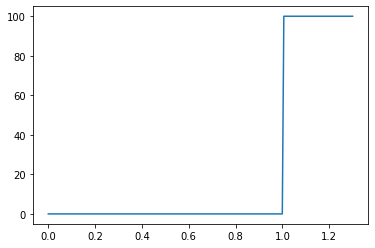

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# This plots the potential barrier on the graph
def get_potential(V0):
    a = 1.0                       # Potential Barrier
    V = np.zeros(len(x))
    wh = np.where(abs(x) >= a)    # Finds the range of x values greater than the barrier
    V[wh[0]] = V0                 # Sets the potential magnitude
    plt.plot(x,V)                 # Plots it
    return V

# This solves the TISE by using the discretized formula derived above
# Parameters: The E0 we choose to find valid state, the parity (odd or even) of that state
# Returns: the phi function and a bool representing if there's an error
def solve_TISE(x, E, parity, V):
    phi = np.zeros(len(x))
    dx = x[1]-x[0]
    if parity == 'odd':
        phi[0] = 0
        phi[1] = dx
    if parity == 'even':
        phi[0] = 1
        phi[1] = 1
    for j in range(1,len(x)-1):
        phi[j+1] = 2*phi[j] - phi[j-1] - 2*dx**2*(E - V[j])*phi[j]    #full time step
        if abs(phi[j+1]) > np.max(V):     # If the phi function goes above the max potential
            return phi, True
    return phi, False

def find_E_states(x, E0, parity, ftol, V):
    for i in range(len(E0)):
      last_sign = ''
      Etol = 0.01
      print('E0...',E0)
      cnt = 0
      while cnt < 2000:
        cnt += 1.0
        [phi, error] = solve_TISE(x, E0[i], parity, V)
        print('phi...',phi[-1],phi[-2],E0[i])
        if abs(phi[-1]-phi[-2]) < ftol:
          break
        if np.sign(phi[-2]-phi[-1]):
          #if np.sign(phi[-1]):
          Etol = Etol*0.9
          E0[i] += Etol
        else:
          #if np.sign(phi[-1]):
          Etol = Etol*0.9
          E0[i] -= Etol
        if E0[i] < 0:
          print("Error: Energy Level Went Below Zero")
          break
      plt.figure()
      plt.plot(x,V)
      plt.plot(x,phi)
      plt.xlabel('x')
      plt.ylabel('V')
      plt.title("E = {:.3}".format(E0[i]))
      plt.ylim(-2,2)

#-----------------------------------------------------------------------------------------

x = np.linspace(0,1.3,200)
dx = x[1]-x[0]
V0 = 100.0
V = get_potential(V0)
ftol = 0.001

# Find Even Parities:
#E0 = np.arange(0, 110, 11.0) # I was stuck on this for a while: You apparently need to make the dx a float in order to add/subtract a float number in the array. 
#E0 = np.arange(0, 30, 1.0)
E0 = np.array([1.5,2.,4.,8.,16.,32.])
print(E0)
parity = 'even'
find_E_states(x, E0, parity, ftol, V)
# Find Odd Parities:
E0 = np.array([1.5,2.,4.,8.,16.,32.])
parity = 'odd'
find_E_states(x, E0, parity, ftol, V)

# Works
# E0 = 9.
# parity = 'even'
# [phi, error] = solve_TISE(x, E0, parity, V)
# plt.plot(x,phi)
# plt.xlabel('x')
# plt.ylabel('V')
# plt.title("E = {:.3}".format(E0))
# plt.ylim(-2,2)

# It sort of works... It's still a bit glitchy and I'm not sure why. 
# Will hand this in tho, spent too long trying to debug..

## Random walk analysis of quantum systems

- Monte Carlo approach based on the relation of the
  Schrodinger equation to a diffusion process in *imaginary*
  time.
- Substitute $\tau = i t/\hbar$ into the TISE for a free particle, 
\begin{equation*}
\frac{\partial \psi(x,\tau)}{\partial \tau} = \frac{\hbar^2}{2m}
\frac{\partial^2 \psi(x,\tau)}{\partial x^2}
\end{equation*}
where we interpret the wave function as a probability density in a
diffusion process with a diffusion coefficient $D = \hbar^2/2m$.
- Instead of solving Schrodinger's equation directly, we can
  replace it with an equivalent random walk problem.
- Since Schrodinger's equation is *linear* (i.e., superposition
  of solutions is also a solution) it is valid to solve by considering
  many non-interacting particles.
- How do we interpret the potential $V(x)$?  Rewrite
  Schr\"{o}dinger's equation as
\begin{equation*}
\frac{\partial \psi(x,\tau)}{\partial \tau} = \frac{\hbar^2}{2m}
\frac{\partial^2 \psi(x,\tau)}{\partial x^2} - V(x) \psi(x,\tau)
\end{equation*}
- If $V\psi$ were the only term on the RHS, we would treat this as
  a source or loss term ($V(x)$ is a rate).
- The complete equation can be viewed as a diffusion equation with
  a source/loss term, where the number of particles increases or
  decreases depending on the sign of $V(x)$.
- The general solution is
\begin{equation*}
\psi(x,\tau) = \sum_n c_n \phi_n(x) e^{-E_n t}
\end{equation*}
- For $\tau \rightarrow \infty$ (consider long term evolution of
  the diffusion equation) the dominant term is the ground
  state energy, 
\begin{equation*}
\psi(x,\tau) \rightarrow c_0 \phi_0(x) e^{-E_0 \tau}
\end{equation*}
which means we can solve for $\phi_0$ and $E_0$ for arbitrary $V(x)$.
- There is a major problem with this method.  For large $\tau$,
  $\psi(x,\tau)$ will decay to zero unless $E_0 = 0$.  But this is not
  the correct solution!
- The trick is to measure $E_0$ from an arbitrary reference
  potential $V_{ref}$, which is adjusted to determine the steady state
  distribution (eigenvector) and associated $E_0$ (eigenvalue).
- Instead solve
 \begin{equation*}
\frac{\partial \psi(x,\tau)}{\partial \tau} = \frac{\hbar^2}{2m}
\frac{\partial^2 \psi(x,\tau)}{\partial x^2} - [V(x) - V_{ref}] \psi(x,\tau)
\end{equation*}
so that
\begin{equation*}
\psi(x,\tau) \approx c_0 \phi_0(x) e^{-(E_0-V_{ref}) \tau}
\end{equation*}
- Integrate w.r.t. $x$ and note that $\partial \psi/\partial x
  \rightarrow 0$ in the limit $|x| \rightarrow \infty$,
 \begin{equation*}
\int \frac{\partial \psi(x,\tau)}{\partial \tau}dx = - \int V(x)
\psi(x,\tau) dx+ \int V_{ref} \psi(x,\tau)dx
\end{equation*}
- Differentiate the general (ground state) solution w.r.t. $\tau$,
\begin{equation*}
\frac{\partial \psi(x,\tau)}{\partial \tau} = (V_{ref} - E_0) \psi(x,\tau)
\end{equation*}
- Thus 
 \begin{equation*}
\int (V_{ref} - E_0) \psi(x,\tau) dx = - \int V(x)
\psi(x,\tau) dx+ \int V_{ref} \psi(x,\tau)dx.
\end{equation*}
- Cancelling the $V_{ref}$ terms,
\begin{equation*}
E_0\int \psi(x,\tau) dx =  \int V(x)
\psi(x,\tau) dx
\end{equation*}
- Solving for $E_0$ yields
\begin{equation*}
E_0 = \frac{ \int V(x)
\psi(x,\tau) dx}{\int \psi(x,\tau) dx}
\end{equation*}
- If $\psi(x,\tau)$ is related the number of particles $n_i$ at
  $x_i$ at time $\tau$,
  then in terms of the random walk model,
\begin{equation*}
E_0 = \langle V \rangle = \frac{\sum n_i V(x_i)}{n_i}
\end{equation*}


## Rules of the random walk solution for $\phi_0$ and $E_0$:

1. Place $N_0$ particles at random initial locations $-1 < x_i < 1$.

2. Compute the initial reference potential, $V_{ref} = \frac{1}{N_0} \sum_i V_i$.

3. Randomly move a particle left or right with step length $\Delta s$ where $\Delta s^2 = D \Delta \tau$.  We will use "dimensionless" units $\hbar = 1$ and $m = 1$ such that $D = \frac{1}{2}$.

4. Compute $\Delta V = [V(x) - V_{ref}] \Delta \tau$ and a random number $0 < r < 1$.  If $\Delta V > 0$ and $r < \Delta V$, then remove the particle (loss process).  If $\Delta V < 0$ and $r < -\Delta V$, then add a particle (source process).

5. Repeat steps 3-4.  Then change the reference potential to
$$ V_{ref} = \langle V \rangle - \frac{1}{N_0}(N- N_0) \Delta \tau$$ 
where $N$ is the new number of particles and $\langle V \rangle$ is the mean potential energy of the $N$ particles.

5. Iterate until the estimate of the ground state energy has reached a steady state energy eigenvalue $E_0$.  The distribution of the particles approximates the eigenfunction $\phi_0$.

# Exercise 2:

1. Study the code below and comment.

2. Determine the ground state energy for $V(x) = \frac{1}{2} x^2$.  Choose the number of particles  $N_0=1000$, step length $ds = 0.1$, and $nsteps = 100$. 

3. Increase $N_0$ and $nsteps$ until you are satisfied that the solution as converged.  Estimate the error by running $ntrials$ and determine the standard deviation of the mean. 

4. Plot the distribution of particles and discuss whether this makes sense for the ground state wave function based on the results from the square potential well.  You might find the following line of code to be useful for plotting,

**This does make sense since the probability of finding it would most likely be where the potential is equal to zero.**

```python
plt.hist(x,density = True, bins=40)
```


Ground Energy State:0.341084793120478
Ground Energy State:0.3595488328866156
Ground Energy State:0.3509404054866238
Ground Energy State:0.34998817257510223
Ground Energy State:0.3576505708542636
Ground Energy State:0.3500265297729173
Ground Energy State:0.34913603001000004
Ground Energy State:0.36110479007857366
Ground Energy State:0.35393267496504915
Ground Energy State:0.36351058652199036
Standard Deviation of the mean: 0.006448322307382279


(array([0.00259638, 0.        , 0.00129819, 0.00259638, 0.00259638,
        0.00129819, 0.00778914, 0.01038552, 0.02077104, 0.03634931,
        0.04284026, 0.06231311, 0.09217147, 0.12202984, 0.16616829,
        0.23237597, 0.24795425, 0.36349314, 0.35310762, 0.37517685,
        0.41282435, 0.52187229, 0.49201393, 0.44008634, 0.4193153 ,
        0.34142391, 0.36738771, 0.31416193, 0.21420131, 0.19343028,
        0.15448458, 0.11034613, 0.06620768, 0.05452397, 0.03245474,
        0.02206923, 0.01428009, 0.00649095, 0.00389457, 0.00259638]),
 array([-3.49337062, -3.33532724, -3.17728387, -3.0192405 , -2.86119713,
        -2.70315375, -2.54511038, -2.38706701, -2.22902363, -2.07098026,
        -1.91293689, -1.75489352, -1.59685014, -1.43880677, -1.2807634 ,
        -1.12272002, -0.96467665, -0.80663328, -0.64858991, -0.49054653,
        -0.33250316, -0.17445979, -0.01641641,  0.14162696,  0.29967033,
         0.45771371,  0.61575708,  0.77380045,  0.93184382,  1.0898872 ,
         1.24793

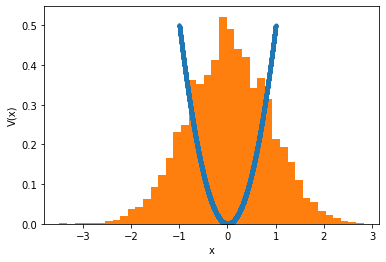

In [ ]:
# Initialize an x value between -1 and 1
def initialize():
    x = -1.0 + 2*np.random.rand(N)
    return x

#Potential function
def potential(x):  
    return 0.5*x*x

# Returns the Vref, the mean of V plus the remaining particles times dtau
def get_Vref():
    Vref = V.mean() - (N-N0)*dtau/N0
    return Vref

# Moves the particle in a random direction (left or right)
def move_particle(x):
    r = np.random.rand(N)
    left = np.where(r < 0.5)
    right = np.where(r >= 0.5)
    x[left[0]] = x[left[0]] - ds
    x[right[0]] = x[right[0]] + ds
    return x

def source_loss(x,V):
    dV = (V - Vref)*dtau    # V is a rate, i.e., per unit tau
    dVpos = dV[dV > 0.0]    # Returns the dV array where dV is positive
    xpos = x[dV > 0.0]      # Returns the position array where dV is positive
    r = np.random.rand(len(dVpos))  
    xpos = xpos[r > dVpos]  #Returns the array of positions where dV's are less than the random number.  
    
    dVneg = dV[dV <= 0.0]   # Returns the dV array where dV is zero or negative 
    r = np.random.rand(len(dVneg))
    xneg = x[dV <= 0.0]     # Returns the position array where dV is negative
    xnew = xneg[r < -dVneg] # Returns the array of positions where the negative dV's are greater than the random number.

    # Appends the two signed arrays then adds new x if applicable
    x = np.concatenate([xpos,xneg]) 
    if len(xnew) > 0:
        x = np.concatenate([x,xnew])
    
    # Based on the x values, calculates the potential
    V = potential(x)
    return x,V


N = 5000
N0 = N
ds = 0.1 # Really your delta x for the grid
nsteps = 200
D = 0.5
dtau = ds**2/D

x = initialize()
V = potential(x)
plt.figure()
plt.plot(x,V,'.')
plt.xlabel('x')
plt.ylabel('V(x)')

num_of_trials = 10
GE = []

for i in range(num_of_trials):
  for i in range(nsteps):
      Vref = get_Vref()
      x = move_particle(x)
      x, V = source_loss(x,V)
      N = len(V)
  print("Ground Energy State:" + str(V.mean()))
  GE.append(V.mean())
   
std_dev_mean = np.std(GE)
print("Standard Deviation of the mean: " + str(std_dev_mean))
plt.hist(x,density = True, bins=40)